In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Computational_Statistics/blob/main/10/W10b.ipynb)

## Bootstrap estimation of standard error
## Bootstrap Example (LSAT vs GPA)


In [3]:
LSAT = np.array([576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594])
GPA = np.array([339, 330, 281, 303, 344, 307, 300, 343, 336, 313, 312, 274, 276, 288, 296])
# 1) Find correlation
# 2) Do bootstrap replicated and find standard error
# 3) plot histogram of bootstrap correlations

In [16]:
np.corrcoef(LSAT, GPA)[0,1]

0.7763744912894072

In [12]:
def bootstrap(x = LSAT, y = GPA, n_replicate = 1000):
  assert len(x) == len(y)
  N = len(x)
  coeff_array = 1000*[0]
  for i in range(1000):
    indexes = np.random.choice(range(N), size = N, replace = True)
    coeff_array[i] = np.corrcoef(x[indexes],y[indexes])[0, 1]
  return np.array(coeff_array)

# What is the boostrap estimation of standard error?

In [20]:
bootstrap(n_replicate = 1000).std(ddof = 0)

0.1364489890166255

# Sketch histogram of distribution of bootstrap replicates


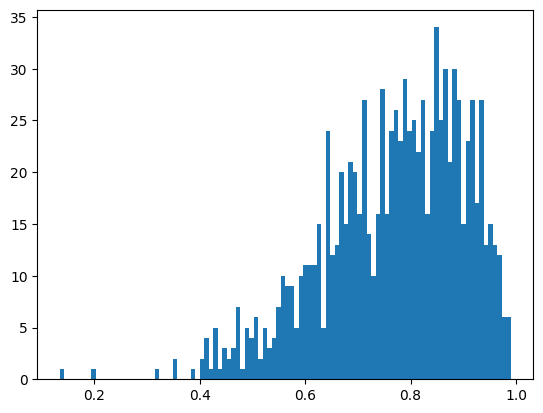

In [13]:
plt.hist(bootstrap(), bins = 100);

## Bootstrap estimation of bias


In [44]:
(bootstrap(n_replicate = 2000)-np.corrcoef(LSAT, GPA)[0,1]).mean()

-0.0032564282965042864

## How to create Jackknife Blocks?


In [52]:
def jackknife(x = LSAT, y = GPA):
  assert len(x) == len(y)
  N = len(x)
  corr_array = N*[0]
  for i in range(N):
    blocks = [j for j in range(N) if j != i]
    corr_array[i] = np.corrcoef(x[blocks], y[blocks])[0,1]
  return np.array(corr_array)

In [53]:
jackknife()

array([0.89294715, 0.76370684, 0.75499837, 0.77609677, 0.73131967,
       0.77996867, 0.78453598, 0.73616183, 0.75173908, 0.7761231 ,
       0.81810071, 0.78571844, 0.74035089, 0.76704134, 0.77987252])

## Let's compute Jackknife bias in the above example

*   List item
*   List item



In [59]:
N = len(LSAT)
(N-1)*(jackknife()-np.corrcoef(LSAT, GPA)[0,1]).mean()

-0.00647362304592464

## Let's compute Jackknife standard error


In [57]:
((N-1)**0.5)*jackknife().std(ddof = 0)

0.14251861860227236